In [1]:
import jax
import jax.numpy as jnp
import myjax.nn as nn
from myjax.utils import Dataset, DataLoader
import matplotlib.pyplot as plt


The model is: 
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True), Total parameters: 2, 
)
Total parameters: 2

The initial parameters are: 
{0: {'weights': Array([[0.15725993]], dtype=float32), 'bias': Array([0.02744711], dtype=float32)}}

Epoch (    0/ 1000) train_loss = 26.21
Epoch (  100/ 1000) train_loss = 1.9834
Epoch (  200/ 1000) train_loss = 1.0482
Epoch (  300/ 1000) train_loss = 0.94696
Epoch (  400/ 1000) train_loss = 0.93597
Epoch (  500/ 1000) train_loss = 0.93485
Epoch (  600/ 1000) train_loss = 0.93473
Epoch (  700/ 1000) train_loss = 0.93465
Epoch (  800/ 1000) train_loss = 0.93468
Epoch (  900/ 1000) train_loss = 0.93477
Epoch ( 1000/ 1000) train_loss = 0.93473

The final parameters are (with w = 3.0 and b = -1.0 as correct answer): 
{0: {'bias': Array([0.9759433], dtype=float32), 'weights': Array([[2.948034]], dtype=float32)}}


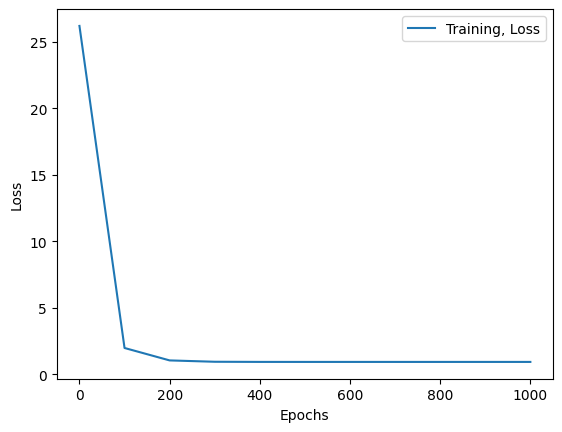

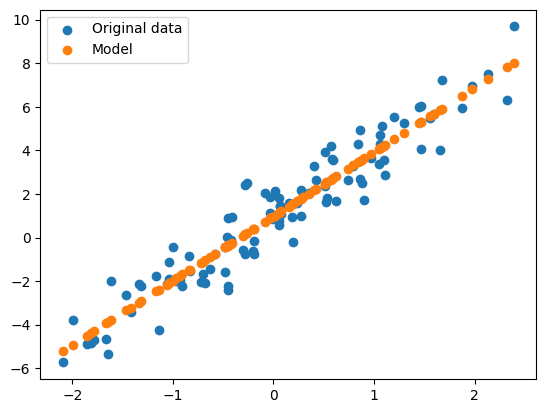

In [2]:
# Random data for testing
seed = 1701
key = jax.random.PRNGKey(seed)
key, x_key, n_key = jax.random.split(key, num=3)
xs = jax.random.normal(x_key, shape=(100,1))
noise = jax.random.normal(n_key, shape=(100,1))
w = 3.0
b = -1.0
ys = xs * w - b + noise

# Create dataset
dataset = Dataset(xs, ys)

# Create dataloader
data = DataLoader(dataset, key=key, batch_size=20)

# Create model
model = nn.Sequential([nn.Linear(1,1) ])

# Initialize Model
key, l1_key = jax.random.split(key)
key, params = model.init(key)
print ('\nThe model is: ')
print (model)


# Initialize trainer
trainer = nn.Trainer(learning_rate=0.001)
print ('\nThe initial parameters are: ')
print (params)

# Fit model
params = trainer.fit(params, model, data, max_epochs = 1000, log_epoch=100)
print (f'\nThe final parameters are (with w = {w} and b = {b} as correct answer): ')
print (params)

# Compare final answer
plt.figure()
plt.scatter(xs, ys,label='Original data')
y_hat = jnp.array(model(params, xs))
plt.scatter(xs, y_hat,label='Model')
plt.legend();

